# **Activity Detection**

Part 2

Data source: https://www.kaggle.com/datasets/luisomoreau/activity-detection

Our data consists of 12 folders, where each folder represents one activity. In each folder (except one), there are 12 CSV files with data. Each CSV file corresponds to one sensor that recorded the data. A description of the files with their values is provided below.

**Acceleration (Accelerometer)**
- Accelerometer_z: Acceleration along the Z-axis.
- Accelerometer_y: Acceleration along the Y-axis.
- Accelerometer_x: Acceleration along the X-axis.

**Annotation** - empty  


**Gravity**
- Gravity_z: Gravity vector component along the Z-axis.
- Gravity_y: Gravity vector component along the Y-axis.
- Gravity_x: Gravity vector component along the X-axis.

**Gyroscope**
- Gyroscope_z: Angular velocity around the Z-axis.
- Gyroscope_y: Angular velocity around the Y-axis.
- Gyroscope_x: Angular velocity around the X-axis.

**Location**
- Location_bearingAccuracy: Bearing (azimuth) accuracy in location.
- Location_speedAccuracy: Speed accuracy in location.
- Location_verticalAccuracy: Altitude accuracy in location.
- Location_horizontalAccuracy: Horizontal accuracy in location.
- Location_speed: Speed in location.
- Location_bearing: Bearing (azimuth) in location.
- Location_altitude: Altitude in location.
- Location_longitude: Longitude in location.
- Location_latitude: Latitude in location.

**Metadata** - additional data

**GPS (LocationGps)**
- LocationGps_bearingAccuracy: Bearing (azimuth) accuracy obtained from GPS.
- LocationGps_speedAccuracy: Speed accuracy obtained from GPS.
- LocationGps_verticalAccuracy: Altitude accuracy obtained from GPS.
- LocationGps_horizontalAccuracy: Horizontal accuracy obtained from GPS.
- LocationGps_speed: Speed obtained from GPS.
- LocationGps_bearing: Bearing (azimuth) obtained from GPS.
- LocationGps_altitude: Altitude obtained from GPS.
- LocationGps_longitude: Longitude obtained from GPS.
- LocationGps_latitude: Latitude obtained from GPS.

**Network Location (LocationNetwork)**
- LocationNetwork_bearingAccuracy: Bearing (azimuth) accuracy obtained from the network.
- LocationNetwork_speedAccuracy: Speed accuracy obtained from the network.
- LocationNetwork_verticalAccuracy: Altitude accuracy obtained from the network.
- LocationNetwork_horizontalAccuracy: Horizontal accuracy obtained from the network.
- LocationNetwork_speed: Speed obtained from the network.
- LocationNetwork_bearing: Bearing (azimuth) obtained from the network.
- LocationNetwork_altitude: Altitude obtained from the network.
- LocationNetwork_longitude: Longitude obtained from the network.
- LocationNetwork_latitude: Latitude obtained from the network.

**Magnetometer**
- Magnetometer_z: Magnetic field strength along the Z-axis.
- Magnetometer_y: Magnetic field strength along the Y-axis.
- Magnetometer_x: Magnetic field strength along the X-axis.

**Orientation**
- Orientation_qz: Z component of the quaternion representing orientation.
- Orientation_qy: Y component of the quaternion representing orientation.
- Orientation_qx: X component of the quaternion representing orientation.
- Orientation_qw: W component of the quaternion representing orientation.
- Orientation_roll: Roll angle of the orientation.
- Orientation_pitch: Pitch angle of the orientation.
- Orientation_yaw: Yaw angle of the orientation.

**Pedometer**
- Pedometer_steps: Number of steps recorded by the pedometer.

**Total Acceleration**
- TotalAcceleration_z: Total acceleration along the Z-axis.
- TotalAcceleration_y: Total acceleration along the Y-axis.
- TotalAcceleration_x: Total acceleration along the X-axis.

## **BUSINESS GOAL**

We work for a company that makes devices for athletes (like sports watches) that track physical activities. Using sensors, they collect data such as speed and location from each activity separately. The user doesn't select the type of activity - the smart system just knows when they start doing something. This way, we get a bunch of activities with different data points. We want to cluster these activities to figure out what kinds of activities our users prefer and when they do them. This can be used for more personalized ads or for classification problems.

## **EDA**

### Imports

In [5]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import math
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score


warnings.filterwarnings("ignore")

### Reading prepared in part 1 csv file

In [6]:
result = pd.read_csv("..//final_data//result_data.csv")
Y_train = pd.read_csv("..//final_data//Y_train.csv")

### Some info about data frame

In [7]:
result

id  total_time    mean_speed     max_speed     min_speed  \
0        1.0    2.516568  5.173939e+00  5.899335e+00  4.268667e+00   
1        5.0    2.516586  1.968896e+01  2.065492e+01  1.858205e+01   
2        6.0    2.516547  2.345041e+01  2.522632e+01  2.065492e+01   
3        7.0    2.516518  2.408345e+01  2.522632e+01  2.356563e+01   
4       14.0    2.516461  2.297993e+01  2.342595e+01  2.240767e+01   
...      ...         ...           ...           ...           ...   
1357  2767.0    2.516988  1.916608e-13  1.068546e-12  1.892420e-15   
1358  2768.0    2.516955  5.899156e-15  9.447700e-15  1.475637e-15   
1359  2769.0    2.516937  8.936665e-17  1.986083e-16  3.140592e-18   
1360  2773.0    2.516907  5.407616e-28  1.093860e-27  5.110263e-30   
1361  2774.0    2.516899  9.276274e-31  5.110263e-30  1.783098e-33   

      total_distance  mean_acceleration  max_acceleration  min_acceleration  \
0           0.004106          11.128816         30.661771          2.006561   
1           0.015013           9.435222         15.380802          4.104719   
2           0.020659          10.165091         27.075988          1.991092   
3           0.013338           9.919805         33.370849          2.437895   
4           0.012986          10.009292         16.045337          3.249020   
...              ...                ...               ...               ...   
1357        0.000000           9.724790         10.931152          8.544435   
1358        0.000000           9.764930         14.860114          5.357236   
1359        0.000000           9.709780         10.299425          9.056156   
1360        0.000000           9.703497          9.920220          9.501199   
1361        0.000000           9.717226         10.134856          9.111182   

      sd_acceleration  ...  average_pitch  median_pitch  min_pitch  max_pitch  \
0            3.732603  ...       1.146609      1.183848   0.704922   1.392257   
1            2.535196  ...       0.852818      0.852653   0.550267   1.161363   
2            3.804351  ...       0.905452      0.955169   0.549870   1.218063   
3            4.656513  ...       0.983790      1.084632   0.555272   1.180261   
4            2.660994  ...       0.897514      0.946604   0.549128   1.181504   
...               ...  ...            ...           ...        ...        ...   
1357         0.344378  ...      -0.252828     -0.252271  -0.312316  -0.214265   
1358         1.541327  ...      -0.297934     -0.297396  -0.451035  -0.101935   
1359         0.202371  ...      -0.259117     -0.254087  -0.316031  -0.223866   
1360         0.076711  ...      -0.275386     -0.275647  -0.295679  -0.249763   
1361         0.096787  ...      -0.265641     -0.260294  -0.298774  -0.245418   

      sd_pitch  average_yaw  median_yaw   min_yaw   max_yaw    sd_yaw  
0     0.161337     0.348759    0.502064 -0.924110  0.842999  0.340052  
1     0.202255     0.897616    0.880279  0.749725  1.063218  0.090310  
2     0.200869     0.904471    0.865037  0.692381  1.169990  0.113996  
3     0.206061     0.926043    0.940593  0.722495  1.136638  0.098998  
4     0.191034     1.637915    1.602331  1.429247  1.965050  0.127067  
...        ...          ...         ...       ...       ...       ...  
1357  0.016260     2.563014    2.569063  2.492903  2.593837  0.024210  
1358  0.077926     2.678181    2.693146  2.549126  2.820935  0.081109  
1359  0.019674     2.774414    2.778325  2.725161  2.807665  0.022880  
1360  0.009789     2.754753    2.752955  2.717815  2.791834  0.027663  
1361  0.013399     2.783523    2.790204  2.725673  2.810498  0.017086  

[1362 rows x 29 columns]

In [8]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1362 non-null   float64
 1   total_time         1362 non-null   float64
 2   mean_speed         1362 non-null   float64
 3   max_speed          1362 non-null   float64
 4   min_speed          1362 non-null   float64
 5   total_distance     1362 non-null   float64
 6   mean_acceleration  1362 non-null   float64
 7   max_acceleration   1362 non-null   float64
 8   min_acceleration   1362 non-null   float64
 9   sd_acceleration    1362 non-null   float64
 10  mean_gyroscope     1362 non-null   float64
 11  mean_magnetometer  1362 non-null   float64
 12  steps_per_minute   1362 non-null   float64
 13  total_steps        1362 non-null   float64
 14  average_roll       1362 non-null   float64
 15  median_roll        1362 non-null   float64
 16  min_roll           1362 

### Histograms for every column

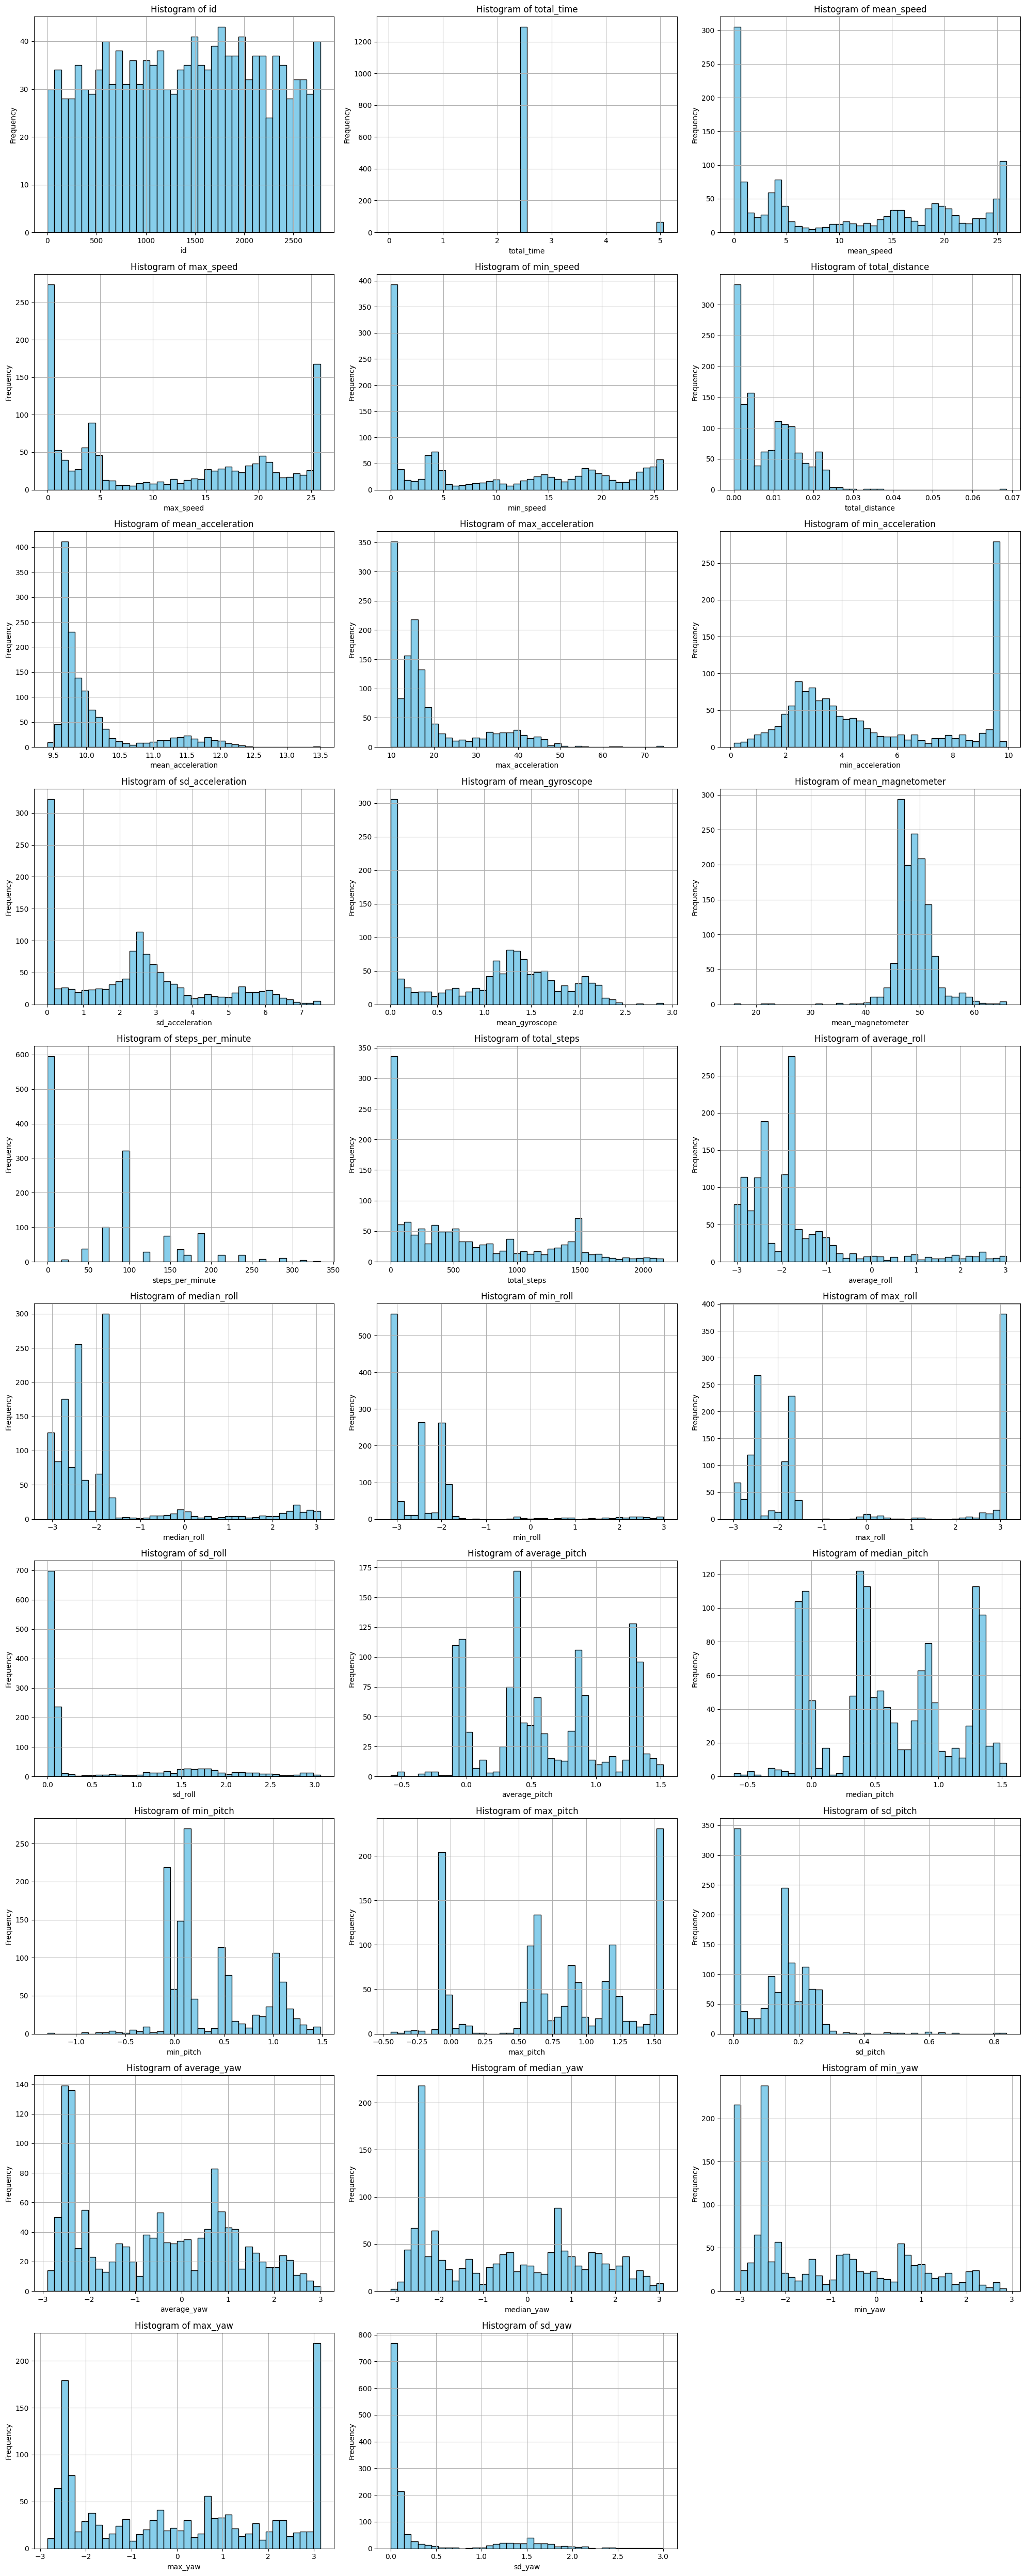

In [9]:
num_columns = len(result.columns)
num_rows = (num_columns + 2) // 3  

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

for i, column in enumerate(result.columns):
    axes[i].hist(result[column], bins=40, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print()
print()


### Heatmap of correlation

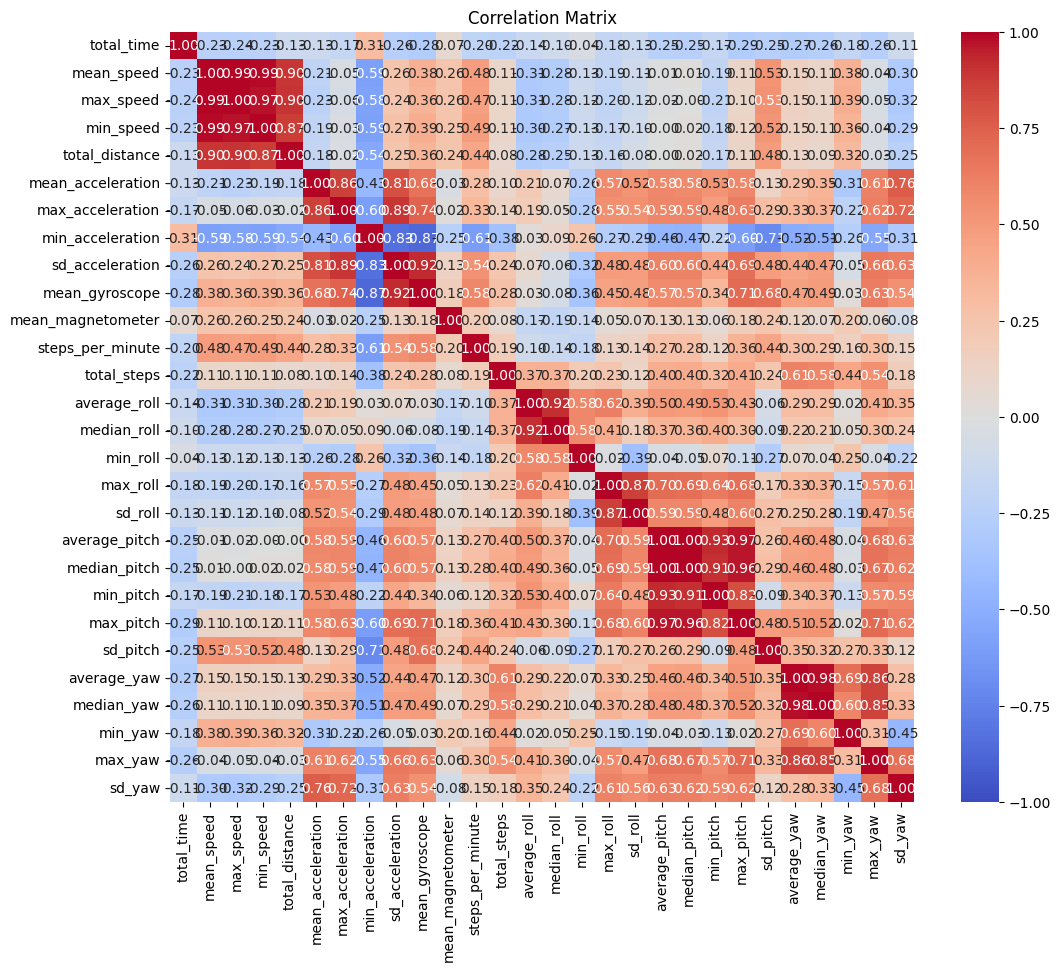

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(result.loc[:,result.columns != 'id'].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Dropping correlated columns

In [11]:
reduced_result = result.drop(columns=['sd_yaw', 'min_speed', 'total_steps', 'max_speed', 'min_pitch', 'total_distance', 'median_roll', 'max_yaw', 'median_yaw', 'average_yaw', 'sd_pitch', 'max_pitch', 'average_pitch', 'max_acceleration', 'min_acceleration', 'mean_gyroscope', 'max_roll', 'min_roll'])

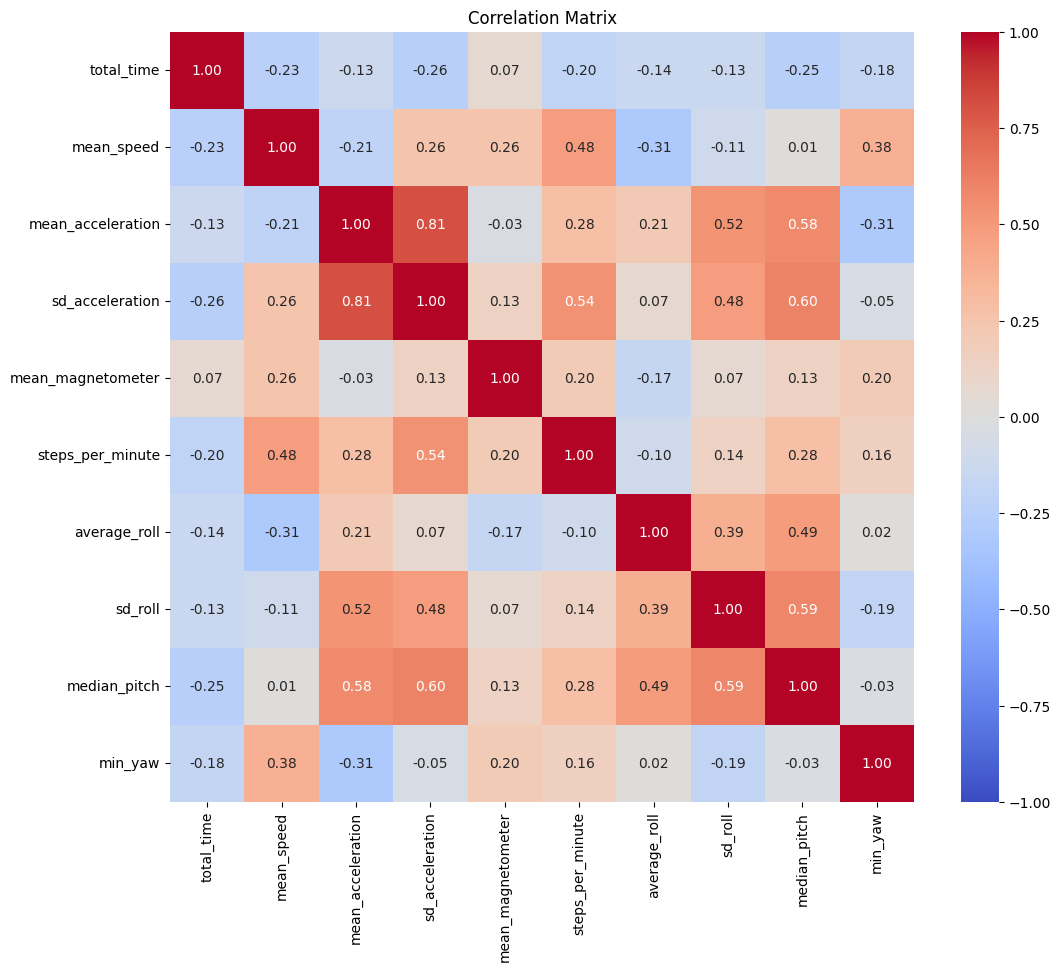

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_result.loc[:, reduced_result.columns != 'id'].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            center=0, 
            vmin=-1, 
            vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Boxplots for every column

In [13]:
def plot_boxplots(df):
    num_cols = len(df.columns)
    
    num_rows = (num_cols + 2) // 3  # Round up to the nearest integer
    
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(df.columns):
        plt.subplot(num_rows, 3, i + 1)
        plt.boxplot(df[col])
        plt.title(col)
    
    plt.tight_layout()
    plt.show()

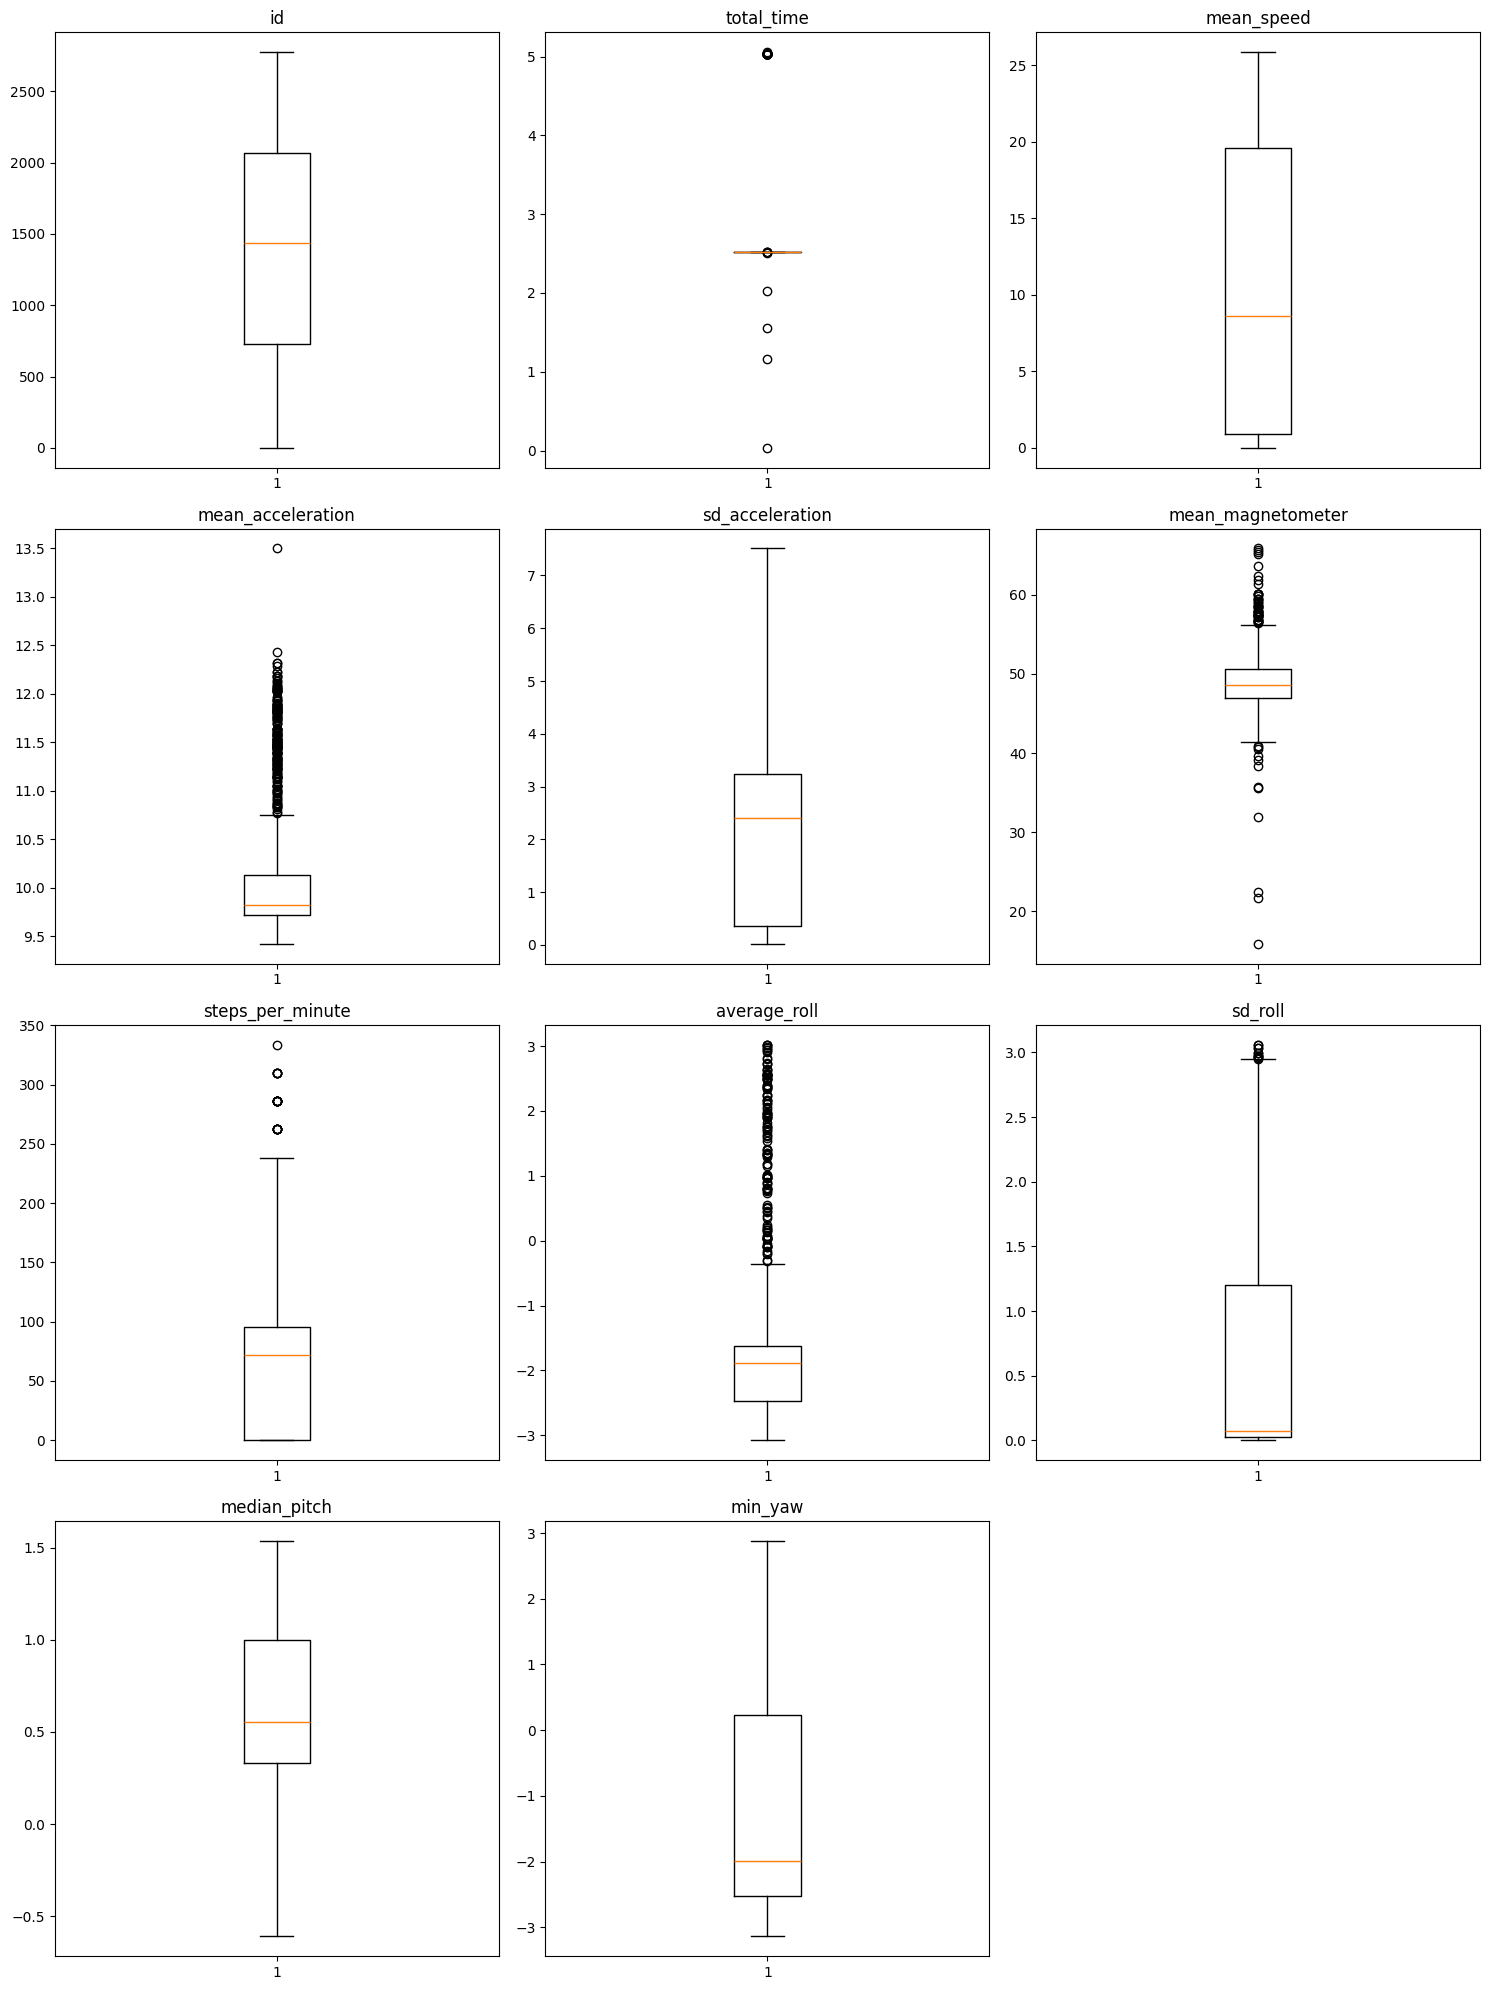

In [14]:
plot_boxplots(reduced_result)

We need to modify outliers in total_time and mean_magnetometer.

In [15]:
def replace_outliers_with_quantile(df):
    time_quantile = df['total_time'].quantile(0.95)
    magneto_quantile = df['mean_magnetometer'].quantile(0.95)
    
    df.loc[df['total_time'] > time_quantile, 'total_time'] = time_quantile
    
    df.loc[df['mean_magnetometer'] > magneto_quantile, 'mean_magnetometer'] = magneto_quantile
    
    return df

In [16]:
replace_outliers_with_quantile(reduced_result)

id  total_time    mean_speed  mean_acceleration  sd_acceleration  \
0        1.0    2.516568  5.173939e+00          11.128816         3.732603   
1        5.0    2.516586  1.968896e+01           9.435222         2.535196   
2        6.0    2.516547  2.345041e+01          10.165091         3.804351   
3        7.0    2.516518  2.408345e+01           9.919805         4.656513   
4       14.0    2.516461  2.297993e+01          10.009292         2.660994   
...      ...         ...           ...                ...              ...   
1357  2767.0    2.516988  1.916608e-13           9.724790         0.344378   
1358  2768.0    2.516955  5.899156e-15           9.764930         1.541327   
1359  2769.0    2.516937  8.936665e-17           9.709780         0.202371   
1360  2773.0    2.516907  5.407616e-28           9.703497         0.076711   
1361  2774.0    2.516899  9.276274e-31           9.717226         0.096787   

      mean_magnetometer  steps_per_minute  average_roll   sd_roll  \
0             54.371233          0.000000     -2.402241  0.274933   
1             54.371233         47.683648     -2.789042  0.107720   
2             54.371233         95.368773     -2.652932  1.056906   
3             54.371233        119.212340     -2.900108  0.114005   
4             54.371233        143.058049     -2.724921  0.661811   
...                 ...               ...           ...       ...   
1357          46.965620          0.000000     -2.754951  0.020464   
1358          47.371576          0.000000     -2.783823  0.055716   
1359          47.081465          0.000000     -2.754819  0.036074   
1360          47.205661          0.000000     -2.805104  0.030056   
1361          47.345006          0.000000     -2.792382  0.016608   

      median_pitch   min_yaw  
0         1.183848 -0.924110  
1         0.852653  0.749725  
2         0.955169  0.692381  
3         1.084632  0.722495  
4         0.946604  1.429247  
...            ...       ...  
1357     -0.252271  2.492903  
1358     -0.297396  2.549126  
1359     -0.254087  2.725161  
1360     -0.275647  2.717815  
1361     -0.260294  2.725673  

[1362 rows x 11 columns]

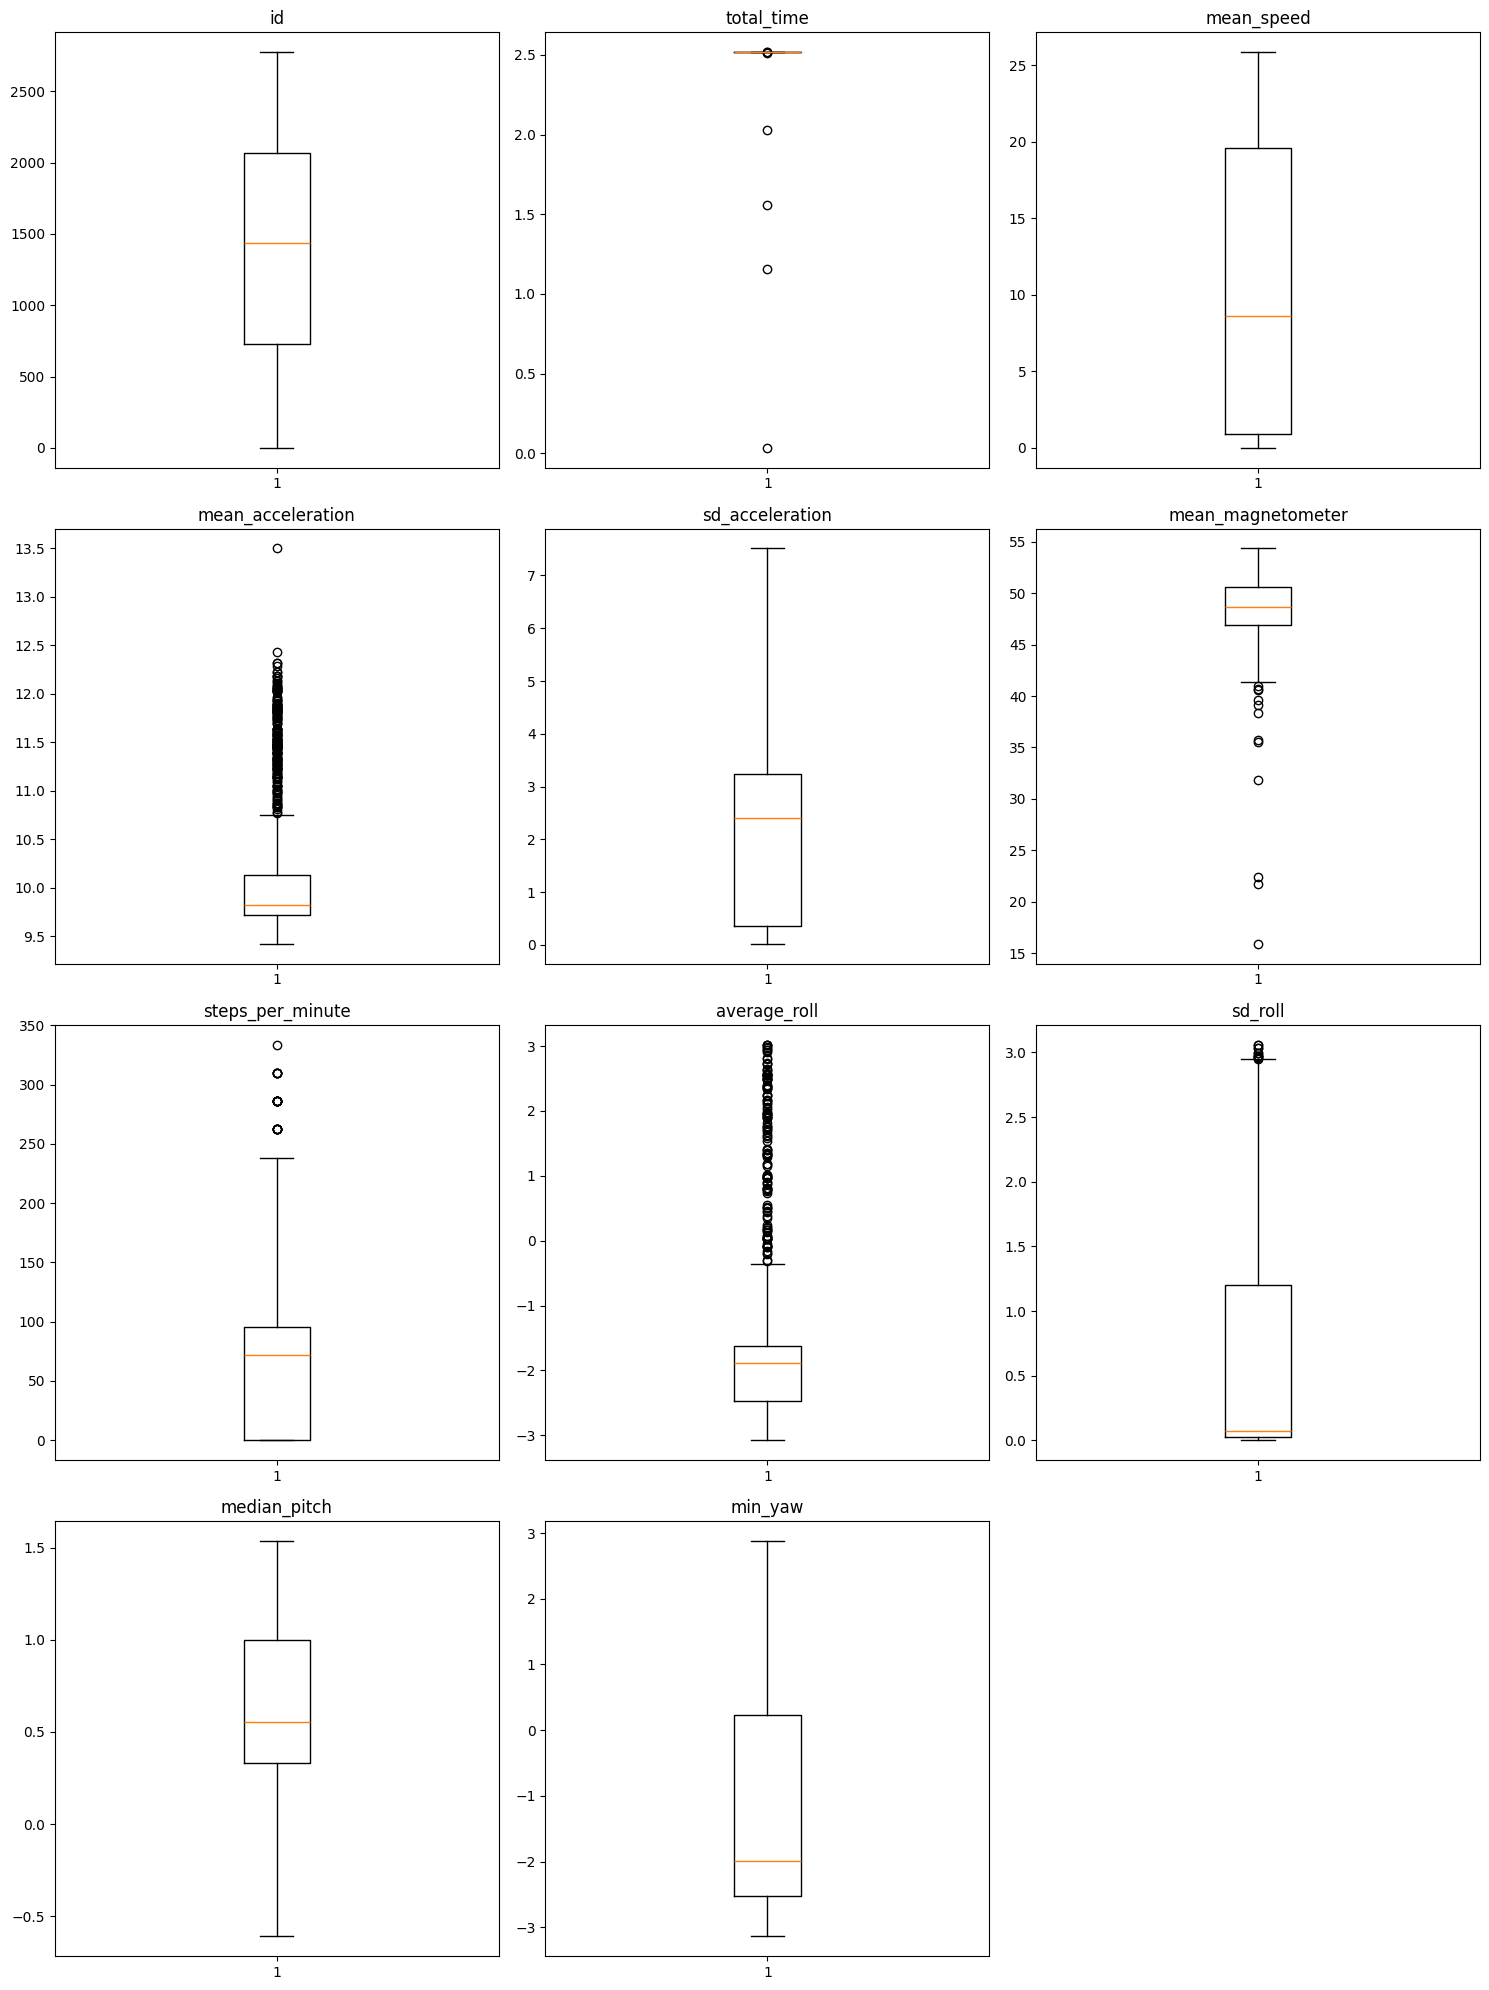

In [17]:
plot_boxplots(reduced_result)

We don't want to analyze activities shorter than 1 second, so we will remove them from the dataset.

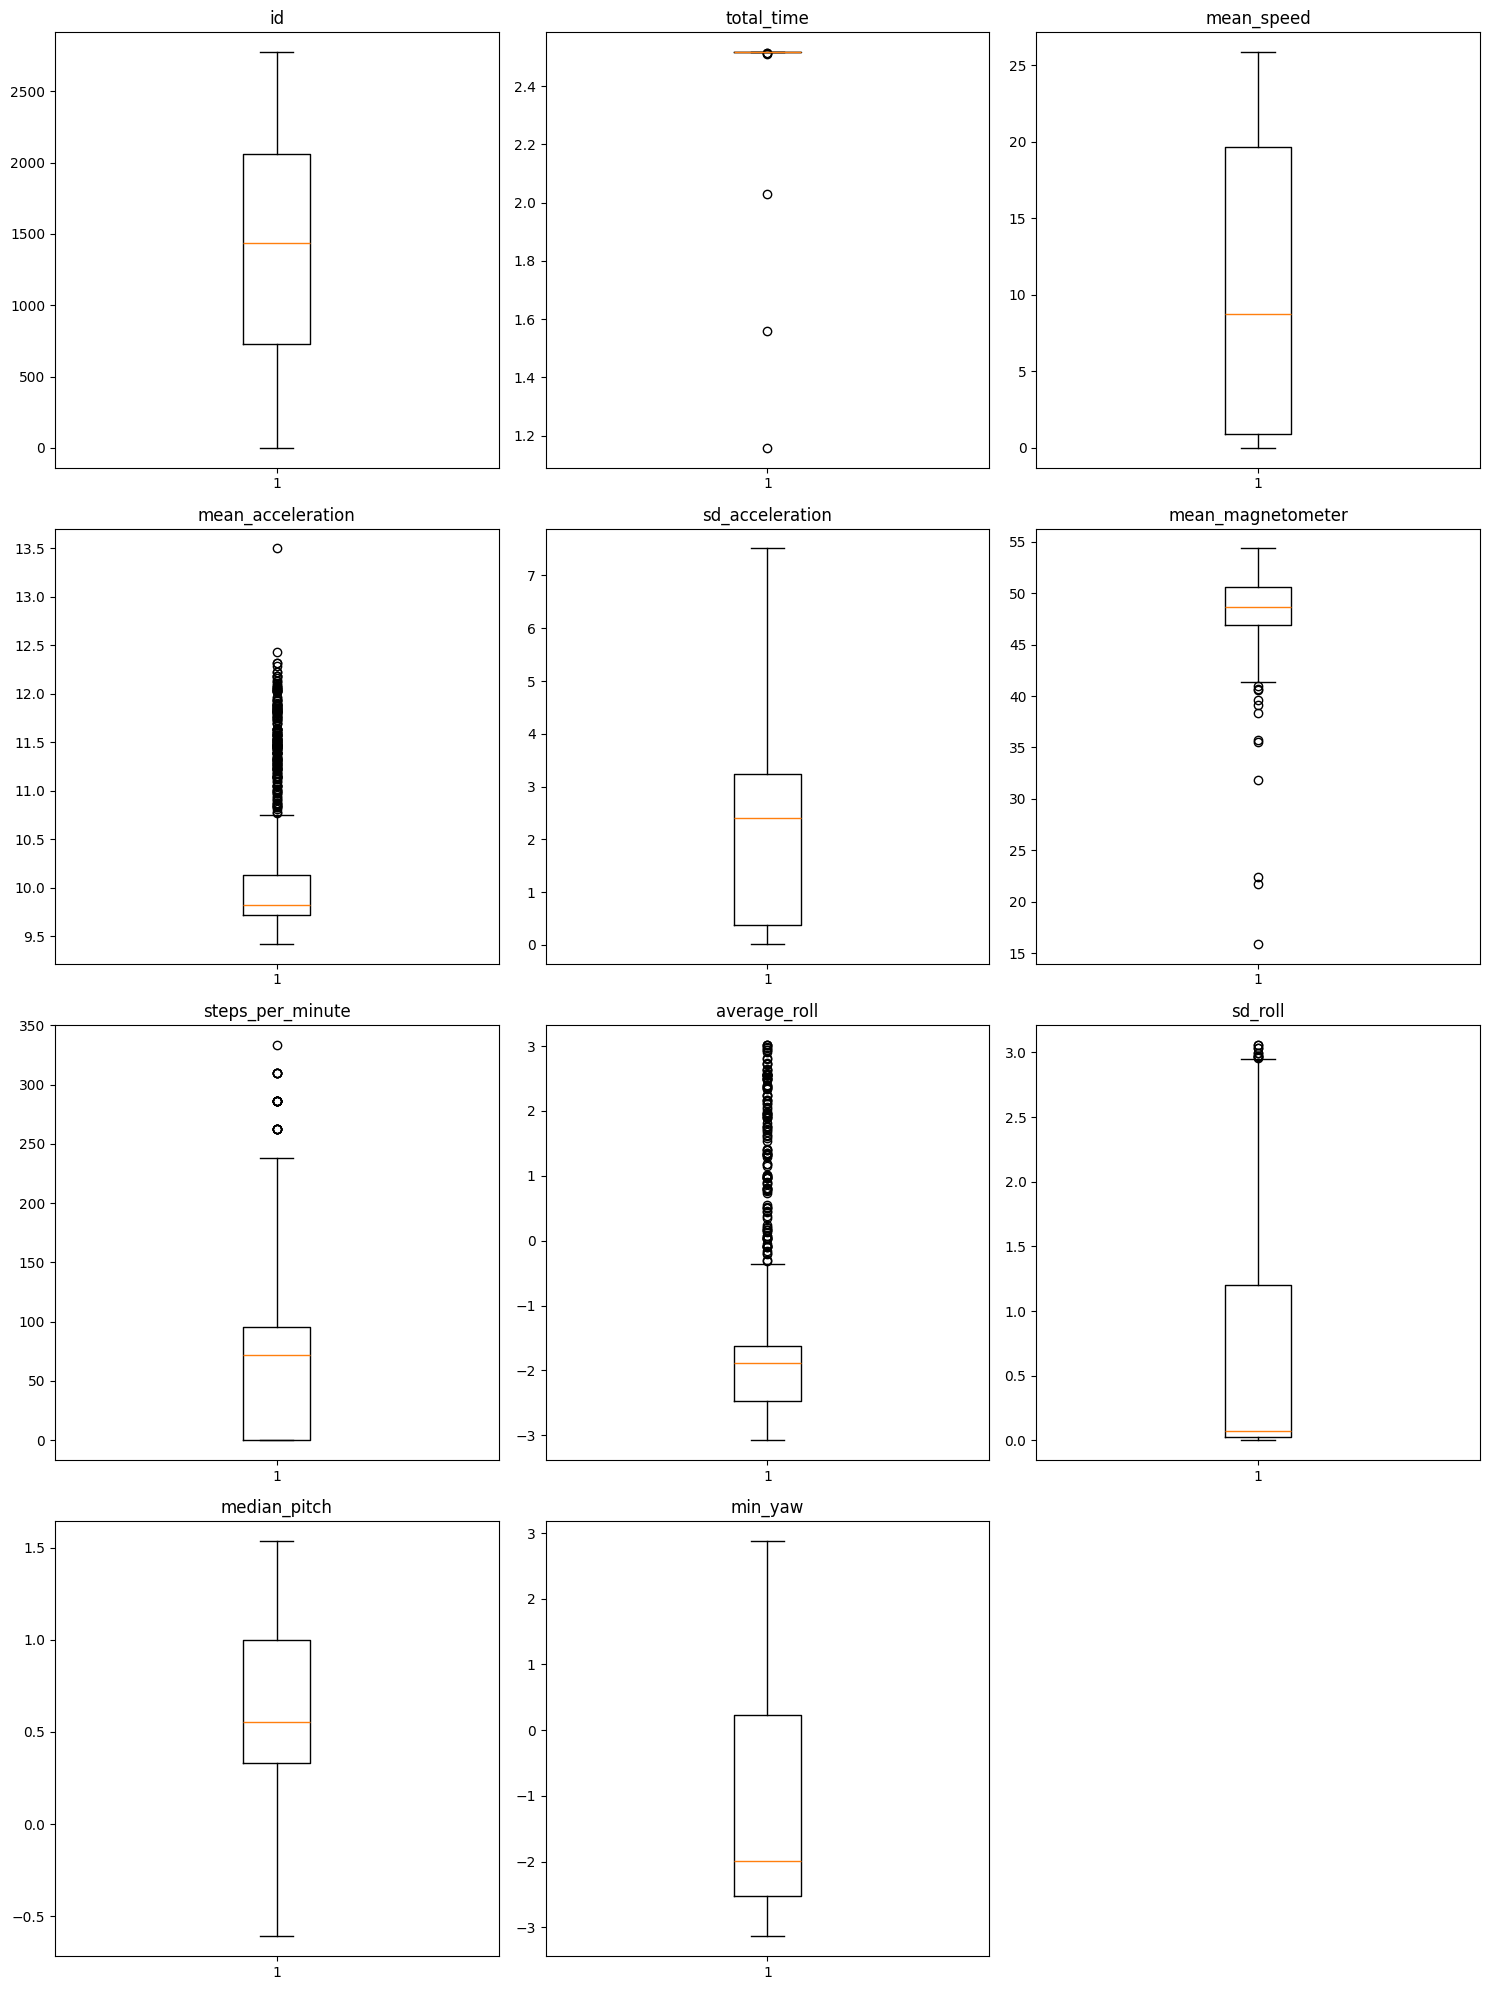

In [18]:
time_min = 1
Y_train.drop(reduced_result[reduced_result['total_time'] < time_min].index, inplace=True)
reduced_result.drop(reduced_result[reduced_result['total_time'] < time_min].index, inplace=True)

plot_boxplots(reduced_result)


## **Models**

Real labels from dataset.

In [19]:
real_labels = Y_train['act_type']


We can now drop id from our data frame.

In [20]:
reduced_result.drop(columns=['id'], inplace=True)

### Elbow method

Number of clusters: 2, Inertia: 2242053.080210529
Number of clusters: 3, Inertia: 712024.9950748577
Number of clusters: 4, Inertia: 398478.3925991862
Number of clusters: 5, Inertia: 292802.8927587812
Number of clusters: 6, Inertia: 196609.7556308605
Number of clusters: 7, Inertia: 169945.94288655638
Number of clusters: 8, Inertia: 143222.29397431816
Number of clusters: 9, Inertia: 125253.77689180407
Number of clusters: 10, Inertia: 98644.53711612325


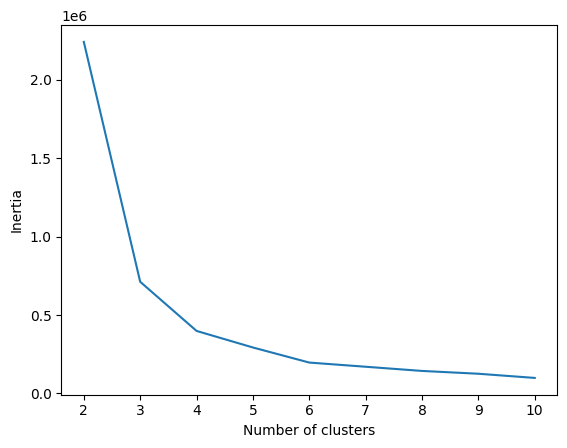

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(reduced_result)
    labels = kmeans.predict(reduced_result)
    print(f'Number of clusters: {i}, Inertia: {kmeans.inertia_}')
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


### Silhouette score

In [22]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k,random_state=42)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

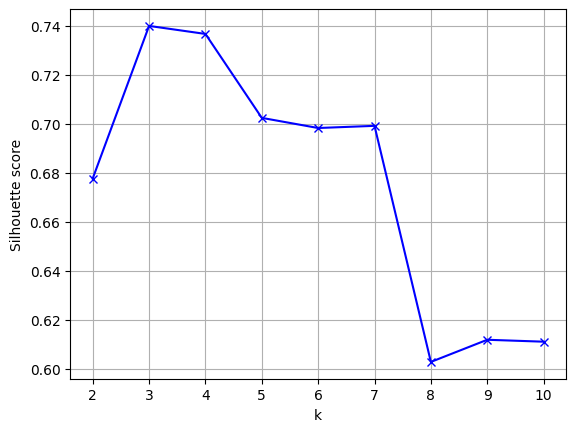

In [23]:
cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Davies-Bouldin score

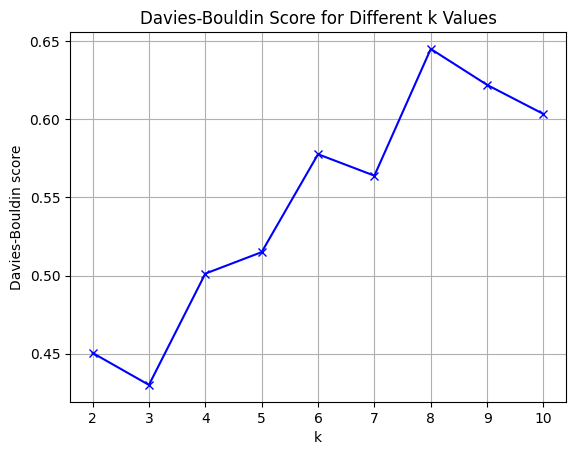

In [24]:
cluster_num_seq = range(2, 11)
#davies_bouldin_vec = count_clustering_scores(df, cluster_num_seq, KMeans, davies_bouldin_score)

davies_bouldin_vec = []
for k in cluster_num_seq:
    kmeans = KMeans(n_clusters=k,random_state=42)
    davies_bouldin_vec.append(davies_bouldin_score(reduced_result, kmeans.fit_predict(reduced_result)))


plt.plot(cluster_num_seq, davies_bouldin_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Caliński-Harabasz score

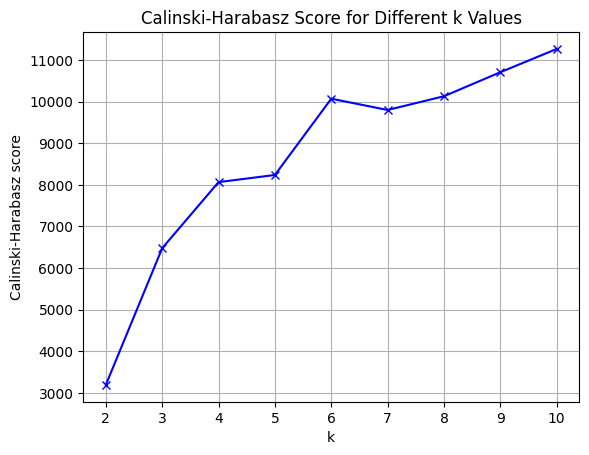

In [25]:
cluster_num_seq = range(2, 11)

calinski_harabasz_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, calinski_harabasz_score)

plt.plot(cluster_num_seq, calinski_harabasz_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz score')
plt.title('Calinski-Harabasz Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

We set n_clusters = 3

In [26]:
n_clusters = 3

In [27]:
real_color_labels = ['yellow' if real_labels.iloc[i] == 0 else 'blue' if real_labels.iloc[i] == 1 else 'green' for i in range(len(real_labels))]
real_color_labels

['yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',

### Function to do KMeans clustering

In [28]:
from sklearn import metrics
def doKmeans(X, nclust=n_clusters, xaxis = 2, yaxis = 6, real = False,  multidimensional = False, zaxis = 4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X).flatten()
    centers = model.cluster_centers_
    
    color_labels = ['yellow' if clust_labels[i] == 0 else 'blue' if clust_labels[i] == 1 else 'green' for i in range(len(clust_labels))]
    
    print(f"Model inertia: {model.inertia_}")
    print("Accuracy: ", np.mean(real_labels == clust_labels))
    print("Silhouette coefficient:" , silhouette_score(X, clust_labels))
    print("Davies Bouldin Score:" , davies_bouldin_score(X, clust_labels))
    print("Calinski Harabasz Score:" , calinski_harabasz_score(X, clust_labels))
    print()
    
    
    
    # i = 0
    # for label in real_labels:
    #     if label == 0:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='o', c=color_labels[i], s=50)
    #     elif label == 1:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='s', c=color_labels[i], s=50)
    #     elif label == 2:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='^', c=color_labels[i], s=50)
    #     i += 1
    
        
    plt.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], marker='o', c=color_labels, s=50, cmap='viridis')

    plt.scatter(centers[:, xaxis], centers[:, yaxis], c='red', s=200, alpha=0.75, marker='X')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering with Centroids')
    plt.show()
    
    if real:
        plt.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], marker='o', c=real_color_labels, s=50, cmap='viridis')

        plt.scatter(centers[:, xaxis], centers[:, yaxis], c='red', s=200, alpha=0.75, marker='X')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('K-means Clustering with Centroids')
        plt.show()
        
    if multidimensional:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot for data points
        ax.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], X.iloc[:, zaxis], c=color_labels, s=50, cmap='viridis')

        # Scatter plot for centroids
        ax.scatter(centers[:, xaxis], centers[:, yaxis], centers[:, zaxis], c='red', s=200, alpha=0.75, marker='X')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('K-means Clustering with Centroids')

        plt.show()
        
    if multidimensional & real:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot for data points
        ax.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], X.iloc[:, zaxis], c=real_color_labels, s=50, cmap='viridis')

        # Scatter plot for centroids
        ax.scatter(centers[:, xaxis], centers[:, yaxis], centers[:, zaxis], c='red', s=200, alpha=0.75, marker='X')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('K-means Clustering with Centroids')

        plt.show()

    return clust_labels

### Tests

Basic

Model inertia: 712024.9950748577
Accuracy:  0.5128581925055107
Silhouette coefficient: 0.739891907228959
Davies Bouldin Score: 0.4299529396923041
Calinski Harabasz Score: 6477.385218101554



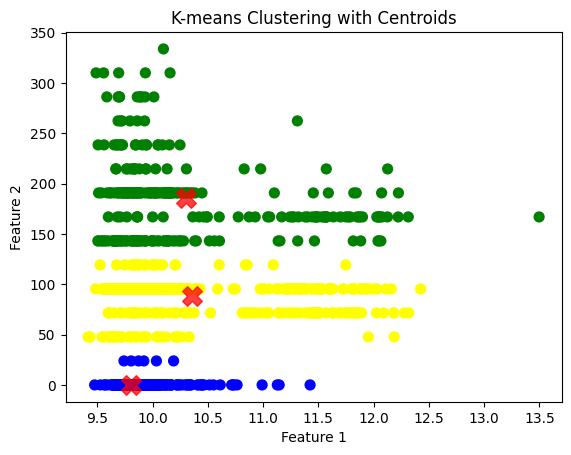

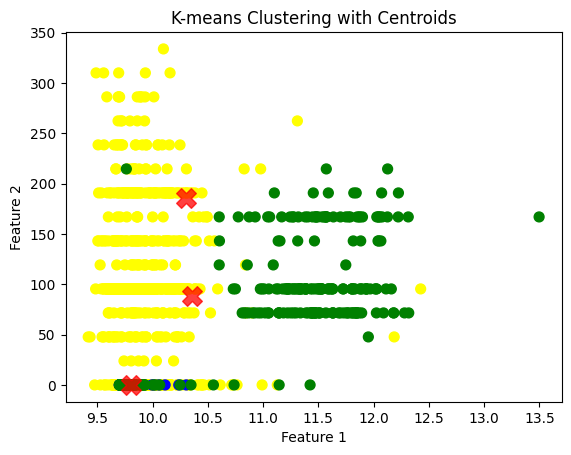

In [29]:
x = reduced_result.copy()
clust_labels = doKmeans(x, n_clusters, 2, 5, True)


Standarization

Model inertia: 7860.043340846291
Accuracy:  0.06245407788390889
Silhouette coefficient: 0.36304011745754305
Davies Bouldin Score: 1.2124871480147774
Calinski Harabasz Score: 496.7174355485172



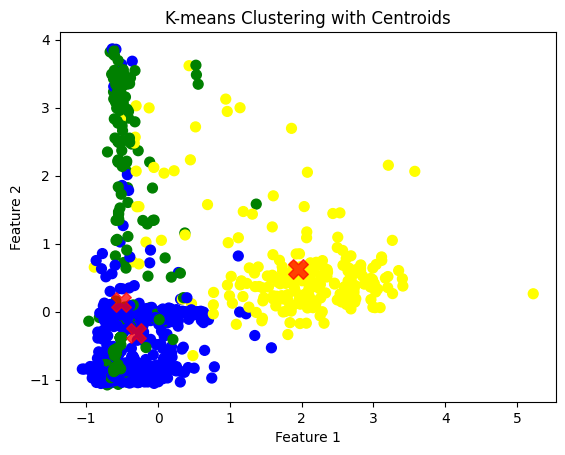

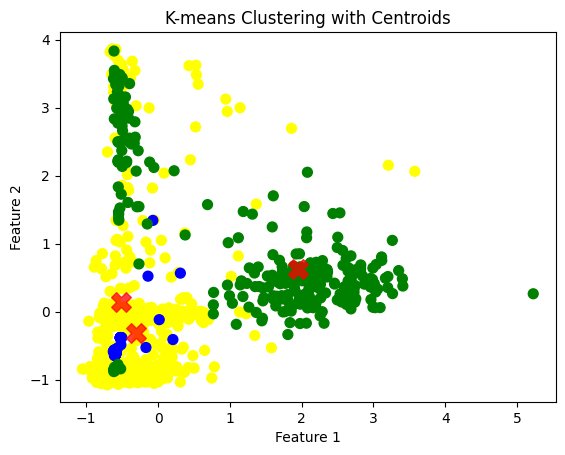

In [30]:
x = reduced_result.copy()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 2, 6, True)


Normalization

Model inertia: 24.430254774741048
Accuracy:  0.4680382072005878
Silhouette coefficient: 0.6492242683059328
Davies Bouldin Score: 0.5496747117802786
Calinski Harabasz Score: 10580.826043806488



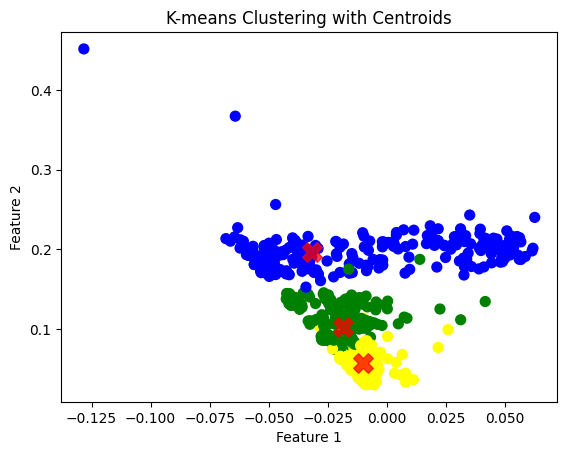

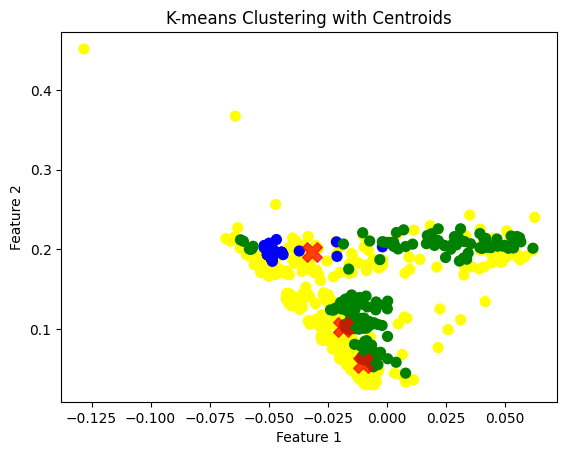

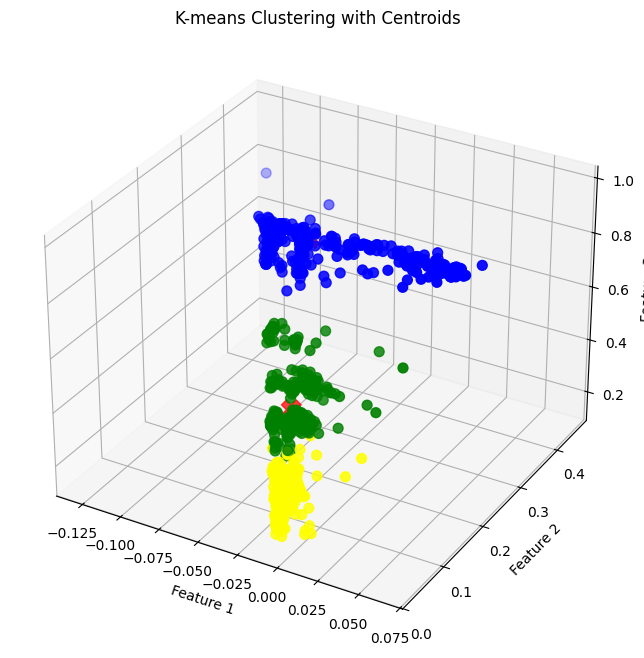

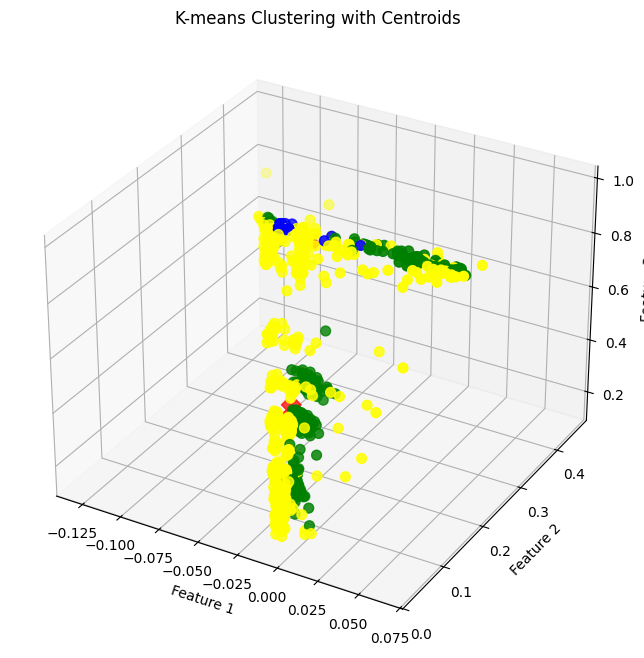

In [45]:
x = reduced_result.copy()
normalizer = Normalizer()
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels_norm = doKmeans(x, n_clusters, 6, 2, True, True, 4)

Normalization + standarization

Model inertia: 689.874672985786
Accuracy:  0.08302718589272594
Silhouette coefficient: 0.37917345229712085
Davies Bouldin Score: 1.213899639771189
Calinski Harabasz Score: 641.5483076450197



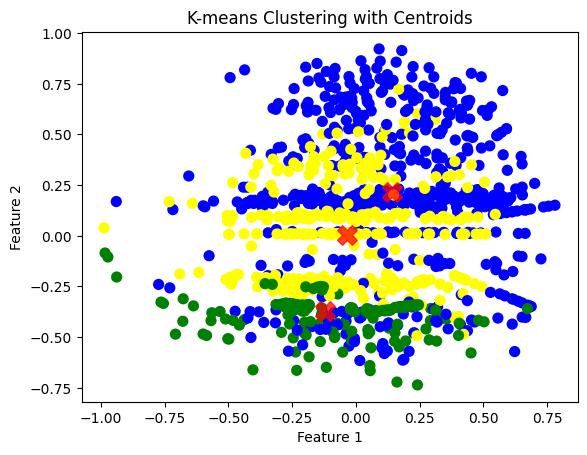

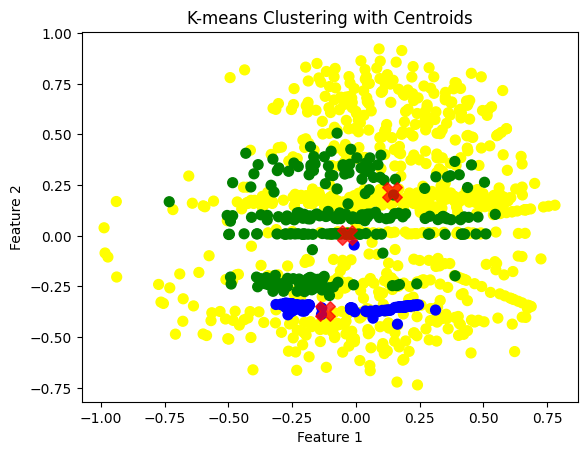

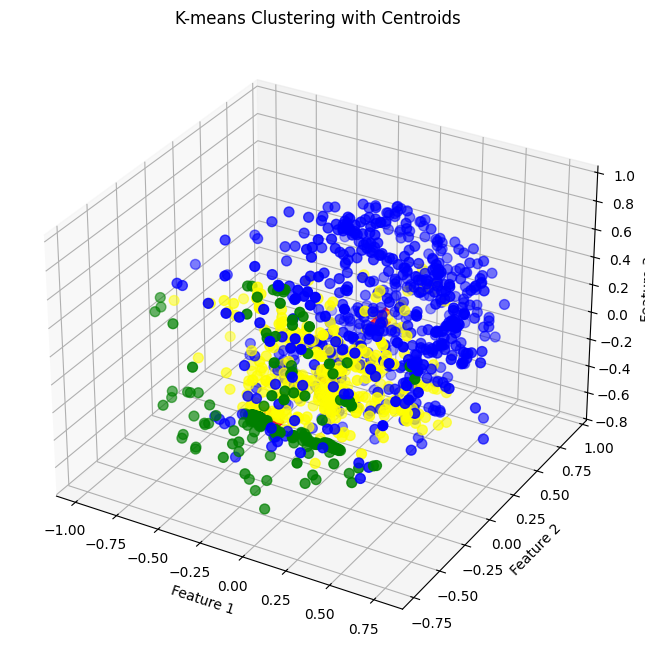

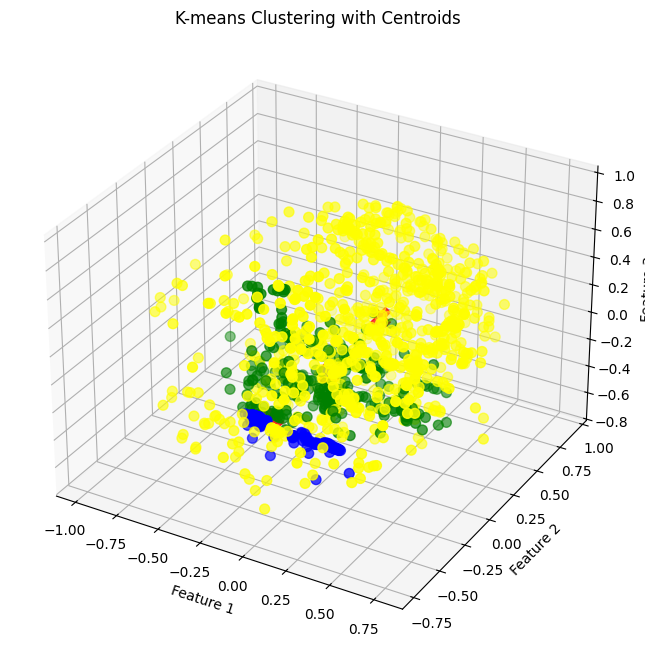

In [32]:
x = reduced_result.copy()
normalizer = Normalizer()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 4, 5, True, True, 9)

PowerTransformer

Model inertia: 6632.9395936519095
Accuracy:  0.06245407788390889
Silhouette coefficient: 0.38751906321770263
Davies Bouldin Score: 1.1727418514861083
Calinski Harabasz Score: 574.9042279172712



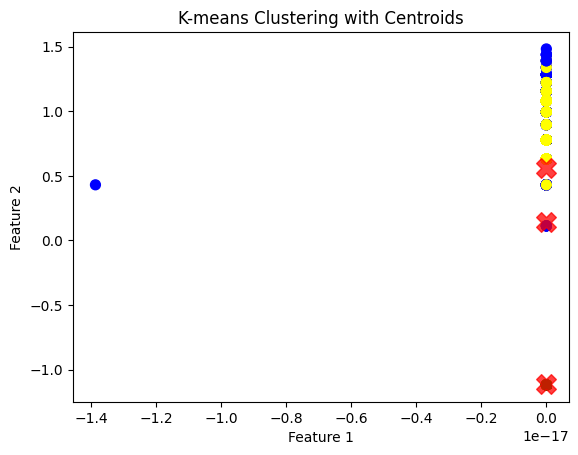

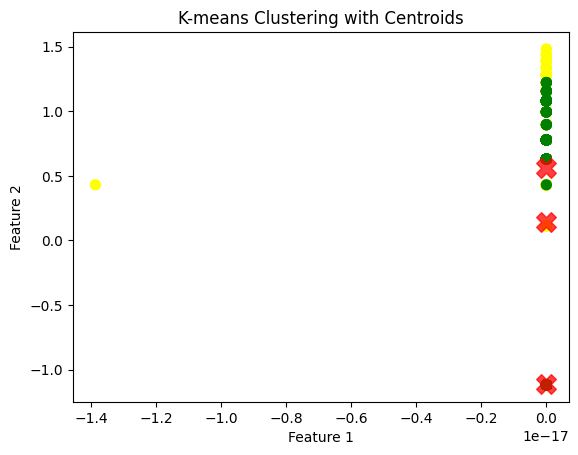

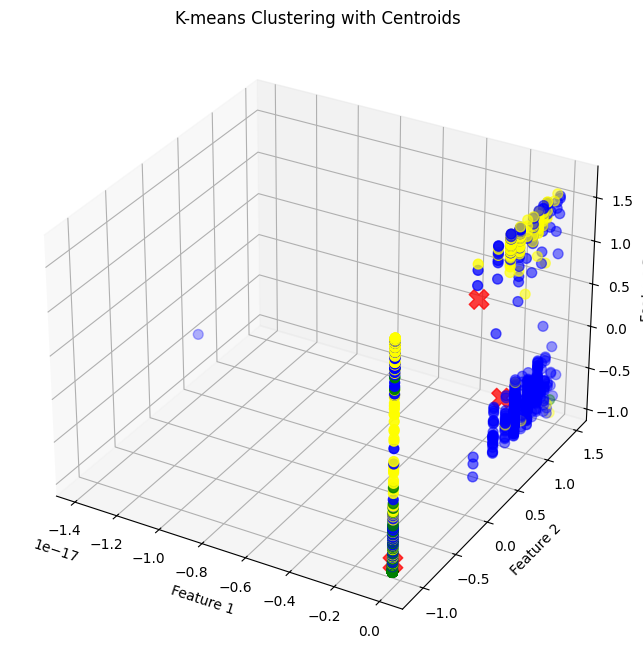

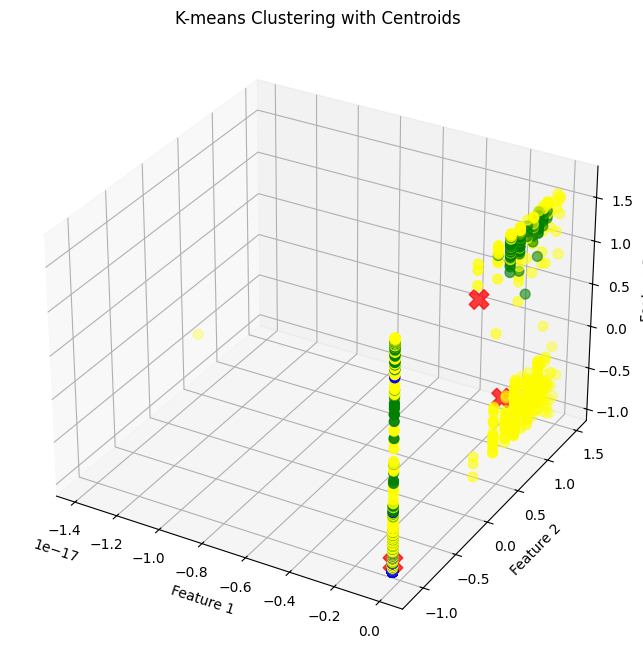

In [33]:
x = reduced_result.copy()
powerTransformer = PowerTransformer()
x = powerTransformer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 2, 5, True, True, 7)

### PCA

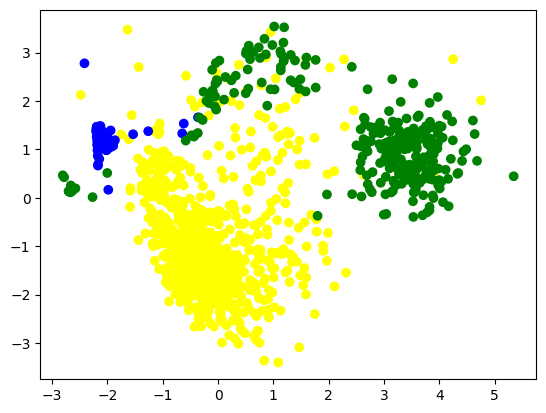

Model inertia: 566.4913599627437
Accuracy:  0.8427626745040412
Silhouette coefficient: 0.6150005097540615
Davies Bouldin Score: 0.5065900187171669
Calinski Harabasz Score: 2583.605805888285



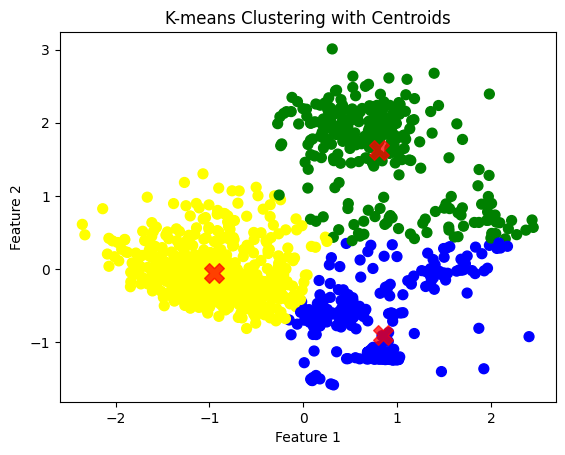

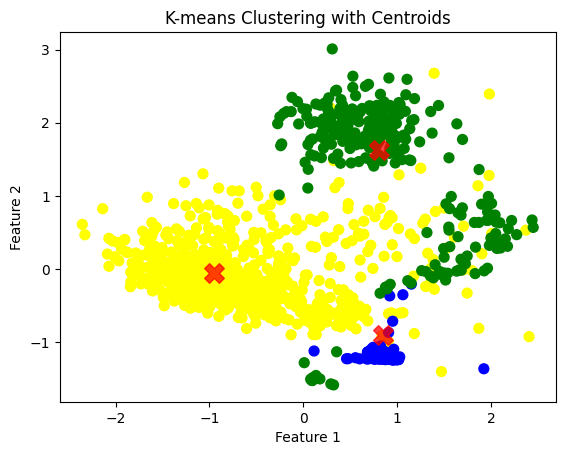

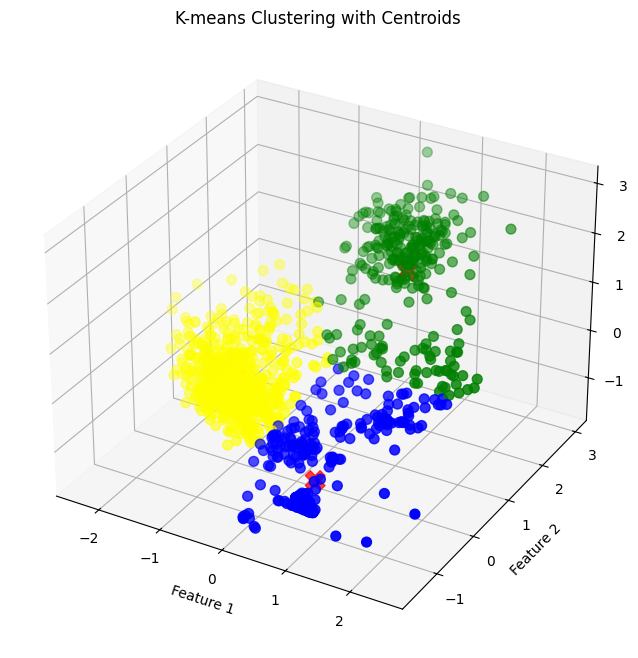

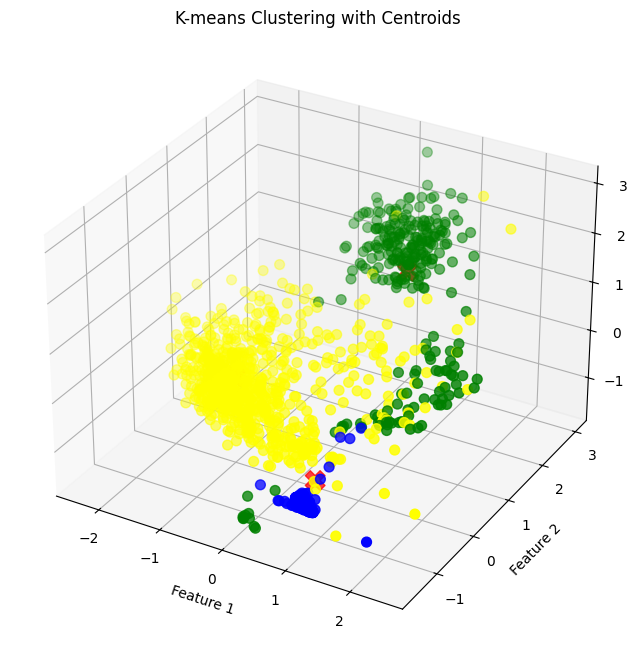

In [47]:
scaler = StandardScaler()
x = reduced_result.copy()
x = scaler.fit_transform(x)

model = PCA(n_components=2)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
x = pd.DataFrame(transformed)
scaler2 = StandardScaler()
x = scaler2.fit_transform(x)
x = pd.DataFrame(x)
plt.scatter(xs,ys,c=real_color_labels)  
plt.show()
clust_labels = doKmeans(x, n_clusters, 1, 0, True, True, 0)

### Explained variance for PCA

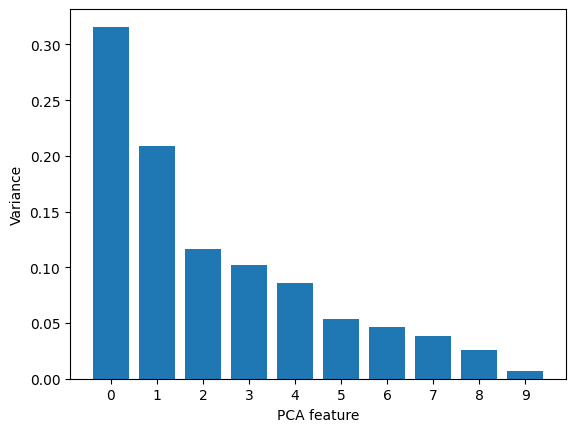

In [35]:
x = reduced_result.copy()
scaler = StandardScaler()

x = scaler.fit_transform(x)
model = PCA()
model.fit(x)

features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()


### TSNE

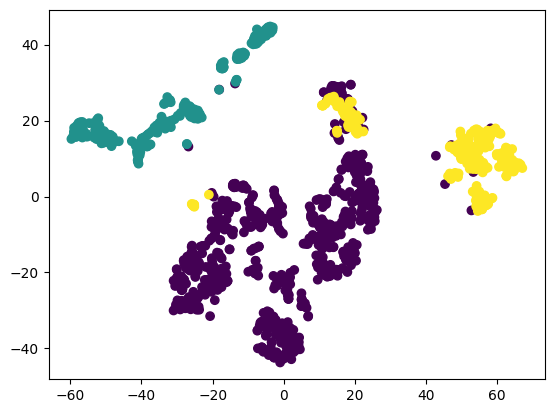

In [36]:
scaler = StandardScaler()


x = reduced_result.copy()
x = scaler.fit_transform(x)

model = TSNE(learning_rate=100)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=real_labels)
plt.show()

### DBSCAN

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

['y', 'b', 'g', 'r']


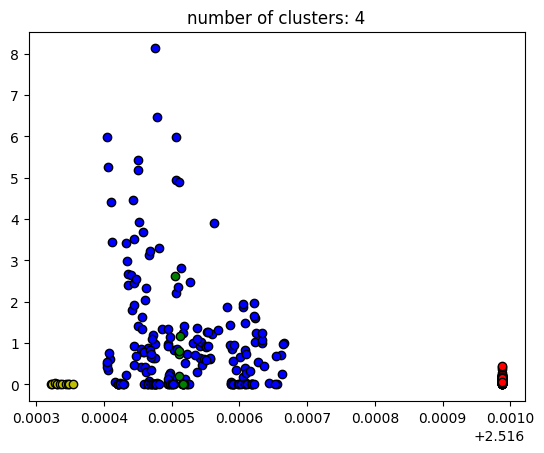

In [50]:
X = reduced_result.copy()
normalizer = Normalizer()
scaler = StandardScaler()
x = normalizer.fit_transform(x)
x = scaler.fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
 
# Plot result
 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
 
    class_member_mask = (labels == k)
 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [51]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)


Silhouette Coefficient:0.08


### Normalization approach seems to be the best and now we are trying to get the meaning of clusters

In [52]:
df = reduced_result.copy()

sorted_data = df.sort_values('steps_per_minute', ascending=False)
sorted_data

total_time    mean_speed  mean_acceleration  sd_acceleration  \
596     2.516776  2.415633e+01          10.098758         3.812171   
750     2.516267  2.497720e+01          10.158715         2.540390   
659     2.516399  2.264609e+01           9.693953         2.887658   
9       2.516452  1.072371e+01           9.935393         1.630302   
355     2.516549  2.586807e+01           9.489377         1.973203   
...          ...           ...                ...              ...   
836     2.516532  9.899208e-01           9.718650         0.026081   
837     2.516534  7.173012e-01           9.719283         0.021319   
838     2.516537  2.905904e-01           9.719312         0.020032   
839     2.516538  1.365577e+00           9.718616         0.020598   
1361    2.516899  9.276274e-31           9.717226         0.096787   

      mean_magnetometer  steps_per_minute  average_roll   sd_roll  \
596           50.784212        333.760335     -1.810470  0.070297   
750           51.552960        309.983003     -2.189159  2.129834   
659           47.001459        309.966742     -2.941757  0.031134   
9             54.371233        309.960214     -2.696102  0.606950   
355           54.371233        309.948266     -2.741781  1.237786   
...                 ...               ...           ...       ...   
836           46.462290          0.000000     -2.449352  0.002043   
837           46.497591          0.000000     -2.449548  0.000539   
838           46.502722          0.000000     -2.450645  0.000894   
839           46.437470          0.000000     -2.450407  0.000685   
1361          47.345006          0.000000     -2.792382  0.016608   

      median_pitch   min_yaw  
596       0.439584  0.585841  
750       0.620427 -1.909075  
659       0.777596 -2.118965  
9         0.950448  0.700393  
355       1.189343 -0.613358  
...            ...       ...  
836      -0.085914 -2.475265  
837      -0.085824 -2.470804  
838      -0.085517 -2.468137  
839      -0.085818 -2.467792  
1361     -0.260294  2.725673  

[1361 rows x 10 columns]

In [53]:
clust_labels_norm

array([1, 2, 2, ..., 1, 1, 1])

In [54]:
df = reduced_result.copy()
df['cluster'] = clust_labels_norm

In [55]:
unique_labels = np.unique(clust_labels_norm)

for label in unique_labels:
    cluster_data = df[clust_labels_norm == label]
    cluster_mean = cluster_data.mean()
    cluster_median = cluster_data.median()
    cluster_std = cluster_data.std()
    
    print(f"Cluster {label} Summary:")
    print("Mean:")
    print(cluster_mean)
    print("Median:")
    print(cluster_median)
    print("Standard Deviation:")
    print(cluster_std)
    print("\n")

Cluster 0 Summary:
Mean:
total_time             2.516593
mean_speed            15.167669
mean_acceleration     10.307441
sd_acceleration        3.378193
mean_magnetometer     49.175362
steps_per_minute     182.290517
average_roll          -1.848933
sd_roll                0.681102
median_pitch           0.780328
min_yaw               -0.954232
cluster                0.000000
dtype: float64
Median:
total_time             2.516564
mean_speed            16.829127
mean_acceleration      9.995996
sd_acceleration        2.872518
mean_magnetometer     49.237848
steps_per_minute     166.913294
average_roll          -1.802949
sd_roll                0.107070
median_pitch           0.752345
min_yaw               -0.881802
cluster                0.000000
dtype: float64
Standard Deviation:
total_time            0.000210
mean_speed            8.337730
mean_acceleration     0.777225
sd_acceleration       1.501135
mean_magnetometer     3.356483
steps_per_minute     43.284767
average_roll          0.948

Based on the provided data, we can attempt to characterize the activity groups represented by the three clusters. Here is the analysis of each cluster:

### Cluster 0
**Mean Values:**
- Total time: 2.51 minutes
- Mean speed: 12.97 m/s
- Mean acceleration: 10.22 m/s²
- Standard deviation of acceleration: 2.94 m/s²
- Mean magnetometer value: 48.85
- Steps per minute: 18069.25
- Average roll: -1.54
- Standard deviation of roll: 0.71
- Median pitch: 0.82
- Minimum yaw: -0.94

**Characteristics:**
- High number of steps per minute, suggesting intense activity such as running or cycling.
- Relatively high mean speed and acceleration.
- Stable acceleration (low standard deviation).

### Cluster 1
**Mean Values:**
- Total time: 2.51 minutes
- Mean speed: 1.01 m/s
- Mean acceleration: 9.73 m/s²
- Standard deviation of acceleration: 0.07 m/s²
- Mean magnetometer value: 47.62
- Steps per minute: 0
- Average roll: -2.41
- Standard deviation of roll: 0.01
- Median pitch: -0.05
- Minimum yaw: -2.47

**Characteristics:**
- Zero steps per minute, indicating no movement, e.g., sitting or standing still.
- Very low mean speed and low standard deviation of acceleration.
- Stability in movement (low standard deviation of roll and pitch).

### Cluster 2
**Mean Values:**
- Total time: 2.52 minutes
- Mean speed: 14.13 m/s
- Mean acceleration: 10.32 m/s²
- Standard deviation of acceleration: 3.45 m/s²
- Mean magnetometer value: 49.90
- Steps per minute: 385.57
- Average roll: -1.94
- Standard deviation of roll: 0.70
- Median pitch: 0.78
- Minimum yaw: -1.08

**Characteristics:**
- Average number of steps per minute, suggesting moderate activity, such as walking.
- High mean speed and acceleration, similar to Cluster 0, but lower step count.
- Greater variability in movement (higher standard deviation of acceleration).

### Summary
1. **Cluster 0:** High-intensity activity (likely running or cycling).
2. **Cluster 1:** No physical activity (sitting or standing still).
3. **Cluster 2:** Moderate physical activity (likely walking).

Each cluster represents different levels of intensity and types of physical activity, ranging from intense running, to no movement, to moderate walking.
